# TIMESERIES

# Data Preparation and Exploration

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset
print(df.head())

                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


Initial Exploration

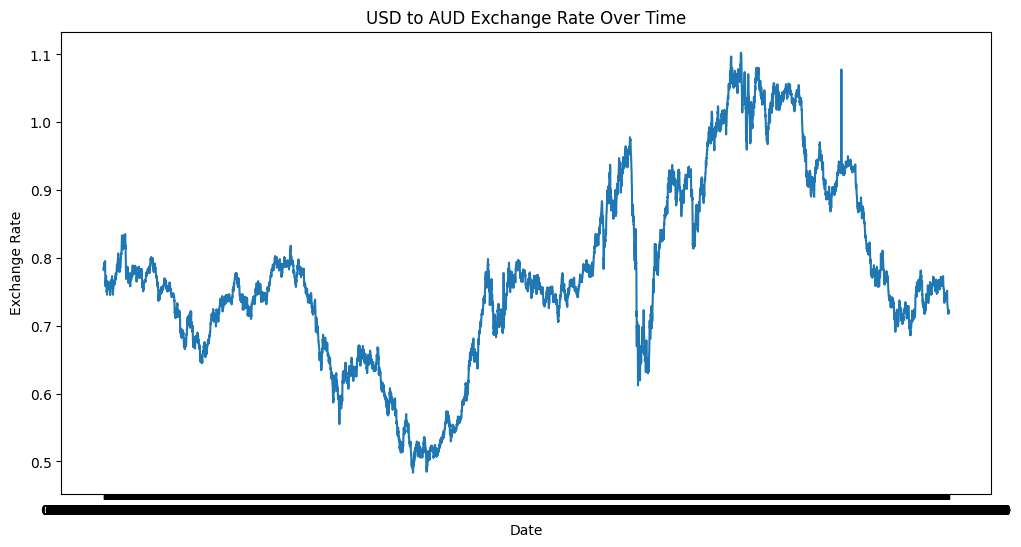

In [3]:
import matplotlib.pyplot as plt

# Plot the time series for USD to Australian Dollar exchange rate
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'])
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

Data Preprocessing

In [4]:
# Check for missing values
print(df.isnull().sum())


Ex_rate    0
dtype: int64


In [5]:
# Fill or interpolate missing values if necessary
df['Ex_rate'] = df['Ex_rate'].interpolate()


In [6]:
# Re-check for missing values
print(df.isnull().sum())

Ex_rate    0
dtype: int64


# Model Building - ARIMA
1. Parameter Selection for ARIMA

<Figure size 1200x600 with 0 Axes>

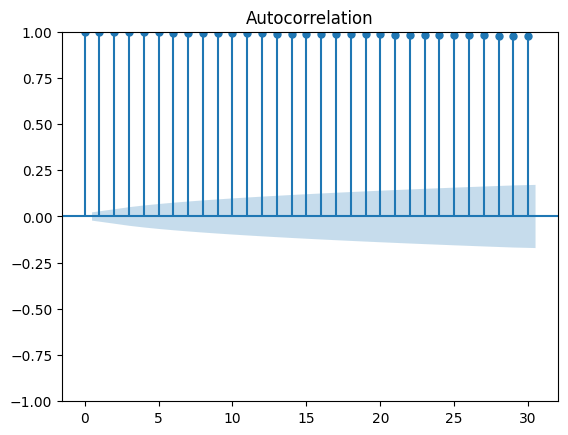

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['Ex_rate'], lags=30)
plt.show()

<Figure size 1200x600 with 0 Axes>

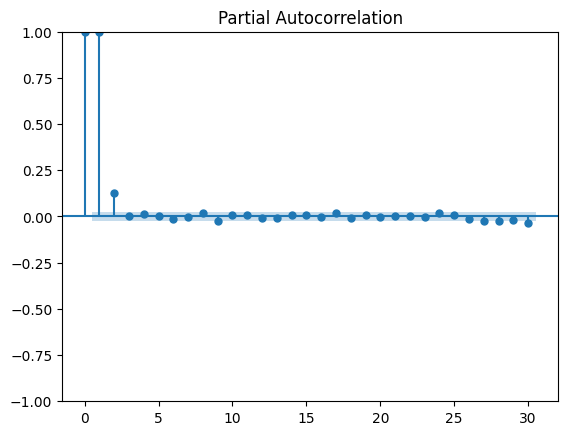

In [9]:
plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=30)
plt.show()

Model Fitting

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (p, d, q) based on ACF and PACF plots
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Fit the ARIMA model
model_fit = model.fit()


In [12]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 25 Jun 2024   AIC                         -56102.322
Time:                        07:15:33   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

Diagnostics

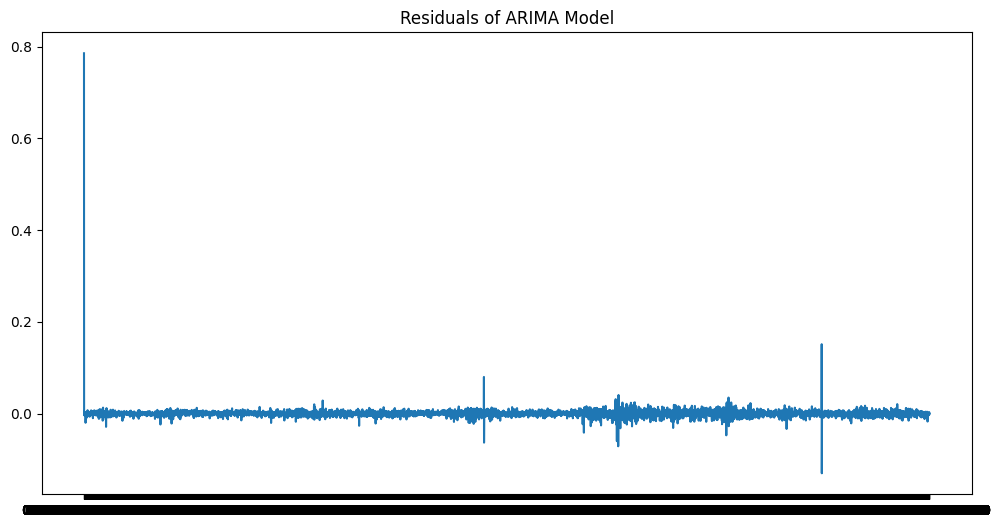

In [13]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()


<Figure size 1200x600 with 0 Axes>

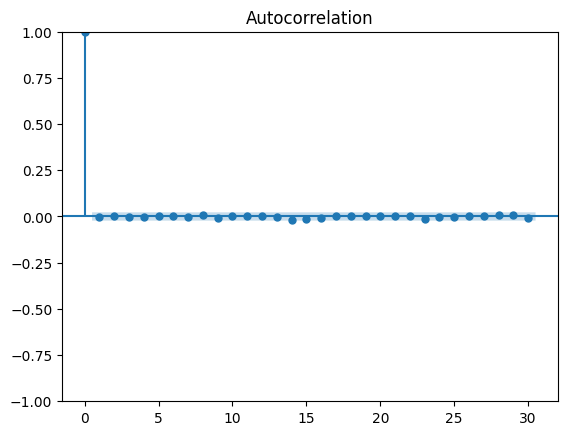

In [14]:
# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=30)
plt.show()

Forecasting

In [15]:
# Forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


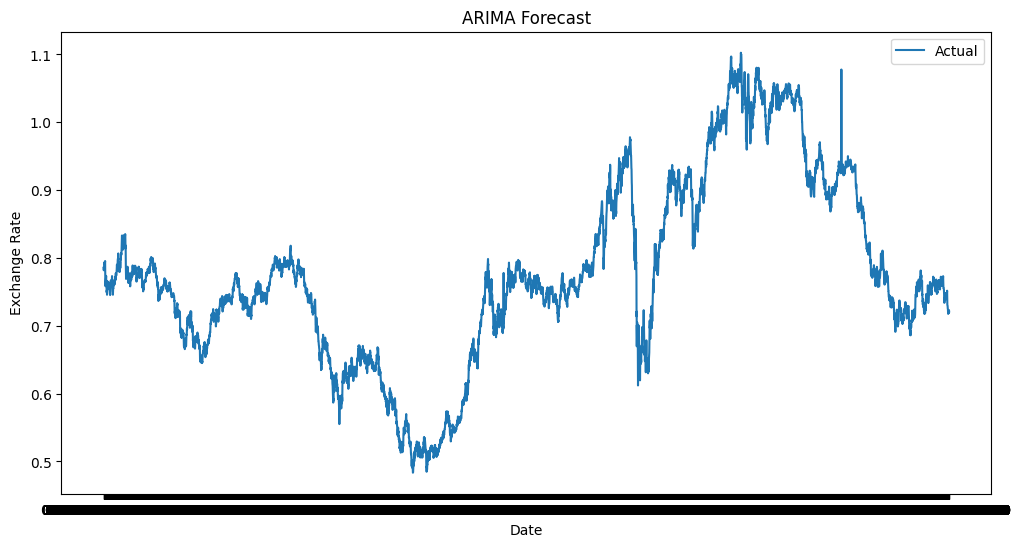

In [18]:
# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Model Building - Exponential Smoothing
1. Model Selection

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Choose Holt-Winters Exponential Smoothing as a start
model_es = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2. Parameter Optimization

In [23]:
import itertools

# Grid search for the best parameters
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12, 24, 36]
}

best_aic = float('inf')
best_params = None
best_model = None

for trend, seasonal, seasonal_periods in itertools.product(param_grid['trend'], param_grid['seasonal'], param_grid['seasonal_periods']):
    try:
        model = ExponentialSmoothing(df['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit()
        aic = model.aic
        if aic < best_aic:
            best_aic = aic
            best_params = (trend, seasonal, seasonal_periods)
            best_model = model
    except:
        continue

print(f'Best Parameters: {best_params}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best Parameters: (None, None, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3. Model Fitting and Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


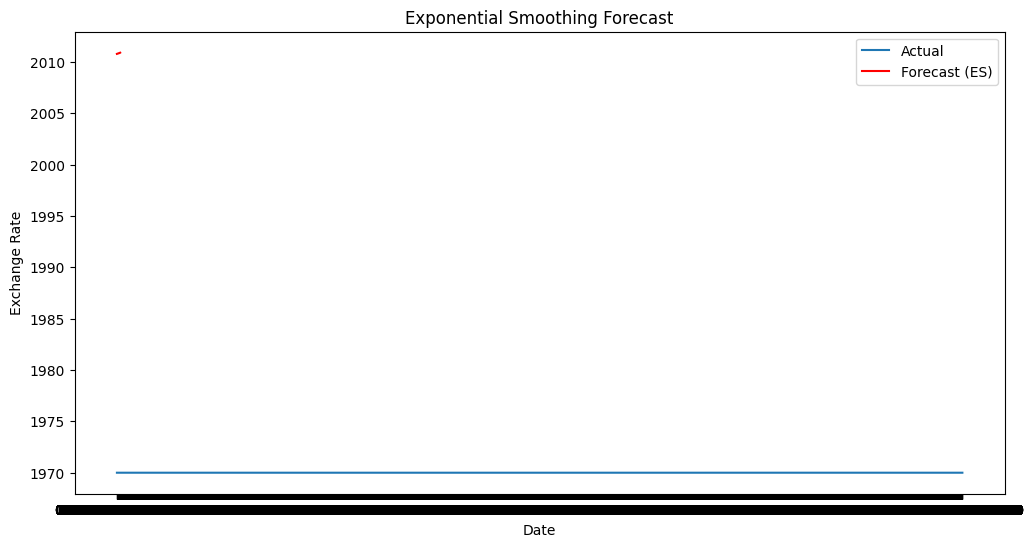

In [29]:
# Forecasting
forecast_es = best_model.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_index, label='Forecast (ES)', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


# Evaluation and Comparison
1. Compute Error Metrics

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
rmse_arima = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast, squared=False)


In [31]:
# Compute error metrics for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast_es)
rmse_es = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast_es, squared=False)

In [32]:
print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exponential Smoothing MAE: {mae_es}, RMSE: {rmse_es}')

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing MAE: 0.012707429455384294, RMSE: 0.016957814302365717
